# Dépression des étudiants

## Introduction 

La dépression est un trouble psychologique qui affecte des millions de personnes dans le monde. L'analyse de données peut fournir des idées précieuses pour comprendre les facteurs qui y sont associés et améliorer le diagnostic. Ce projet vise à prédire si un étudiant va tomber en dépression ou non. Pour cela, nous allons effectuer des analyses statistiques et construire des modèles prédictifs pour identifier les individus à risque.

Objectifs :

- Explorer les données et identifier les facteurs corrélés à la dépression.
- Créer et évaluer des modèles pour prédire la probabilité de dépression.
- Tirer des conclusions exploitables pour une meilleure prévention.

Dans un premier temps, nous allons importer les bibliothèques nécessaires ainsi que les données.

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("C:\\Users\\Nesho\\Downloads\\Student_Depression_Dataset.csv")

In [3]:
data.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [4]:
data.describe(include="all")

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
count,27901.000000,27901,27901.000000,27901,27901,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901,27901,27901,27901,27901.000000,27898.000000,27901,27901.000000
unique,NaN,2,NaN,52,14,NaN,NaN,NaN,NaN,NaN,5,4,28,2,NaN,NaN,2,NaN
top,NaN,Male,NaN,Kalyan,Student,NaN,NaN,NaN,NaN,NaN,Less than 5 hours,Unhealthy,Class 12,Yes,NaN,NaN,No,NaN
freq,NaN,15547,NaN,1570,27870,NaN,NaN,NaN,NaN,NaN,8310,10317,6080,17656,NaN,NaN,14398,NaN
mean,70442.149421,NaN,25.822300,NaN,NaN,3.141214,0.000430,7.656104,2.943837,0.000681,NaN,NaN,NaN,NaN,7.156984,3.139867,NaN,0.585499
std,40641.175216,NaN,4.905687,NaN,NaN,1.381465,0.043992,1.470707,1.361148,0.044394,NaN,NaN,NaN,NaN,3.707642,1.437347,NaN,0.492645
min,2.000000,NaN,18.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.000000,NaN,0.000000
25%,35039.000000,NaN,21.000000,NaN,NaN,2.000000,0.000000,6.290000,2.000000,0.000000,NaN,NaN,NaN,NaN,4.000000,2.000000,NaN,0.000000
50%,70684.000000,NaN,25.000000,NaN,NaN,3.000000,0.000000,7.770000,3.000000,0.000000,NaN,NaN,NaN,NaN,8.000000,3.000000,NaN,1.000000
75%,105818.000000,NaN,30.000000,NaN,NaN,4.000000,0.000000,8.920000,4.000000,0.000000,NaN,NaN,NaN,NaN,10.000000,4.000000,NaN,1.000000


Certaines variables comme "Work pressure" et "Job Satisfaction" possèdent très peu de données ce qui est normal car le but est de déterminer si un étudiant est en dépression ou non, et non pas de déterminer si un employé est en dépression. Donc nous n'allons pas les utiliser par la suite.

On remarque aussi que l'âge moyen des étudiants est de 25 ans environ et que 75% d'entre eux ont moins de 30 ans. Ainsi, la majorité des personnes sont plutôt "jeunes".

Nous allons également renommer les colonnes pour plus de lisibilités.

In [5]:
data.columns = ["id", "Sexe", "Age", "Ville", "Profession", "Pression_Académique", "Pression_au_travail", "Note_a_l'école", 
               "Satisfaction_étude", "Satisfaction_travail", "Temps_de_sommeil", "Habitudes_alimentaires", "Diplome", "Sucidaire?",
               "Heures_de_travail", "Stress_financier", "Prblml_mentaux_famille", "Dépression"]

In [6]:
data.head()

,id,Sexe,Age,Ville,Profession,Pression_Académique,Pression_au_travail,Note_a_l'école,Satisfaction_étude,Satisfaction_travail,Temps_de_sommeil,Habitudes_alimentaires,Diplome,Sucidaire?,Heures_de_travail,Stress_financier,Prblml_mentaux_famille,Dépression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [7]:
data.isnull().sum()

id                        0
Sexe                      0
Age                       0
Ville                     0
Profession                0
Pression_Académique       0
Pression_au_travail       0
Note_a_l'école            0
Satisfaction_étude        0
Satisfaction_travail      0
Temps_de_sommeil          0
Habitudes_alimentaires    0
Diplome                   0
Sucidaire?                0
Heures_de_travail         0
Stress_financier          3
Prblml_mentaux_famille    0
Dépression                0
dtype: int64

Nous remarquons qu'il y a 3 valeurs manquantes dans la variable "Stress_financier", mais vu qu'il y a plus de 27 000 observations, nous décidons de ne pas les traiter et de les laisser telles qu'elles.

In [8]:
data.dtypes

id                          int64
Sexe                       object
Age                       float64
Ville                      object
Profession                 object
Pression_Académique       float64
Pression_au_travail       float64
Note_a_l'école            float64
Satisfaction_étude        float64
Satisfaction_travail      float64
Temps_de_sommeil           object
Habitudes_alimentaires     object
Diplome                    object
Sucidaire?                 object
Heures_de_travail         float64
Stress_financier          float64
Prblml_mentaux_famille     object
Dépression                  int64
dtype: object

Nous séparons les variables catégorielles et les variables numériques en deux.

In [9]:
cat_var = ["Sexe", "Ville", "Profession", "Pression_Académique",  
               "Satisfaction_étude",  "Habitudes_alimentaires", "Diplome", "Sucidaire?",
           "Stress_financier", "Prblml_mentaux_famille", "Dépression"]

Nous effectuons un bar plot pour analyser la répartition des variables catégorielles. Le but est d'avoir une représentation de la répartition de nos données. 

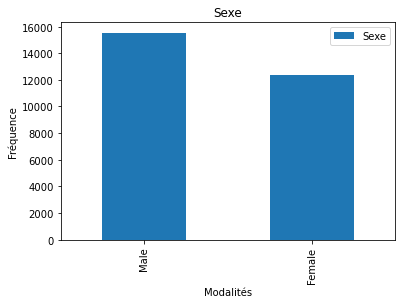

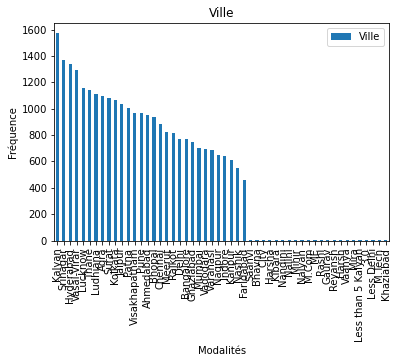

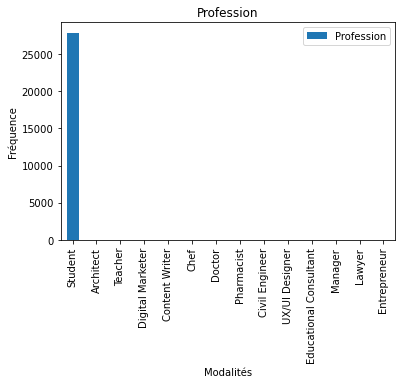

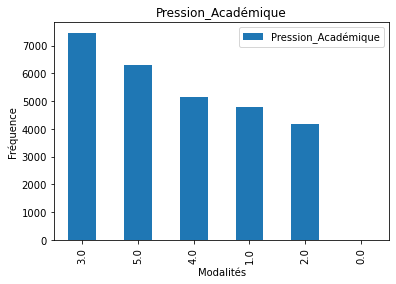

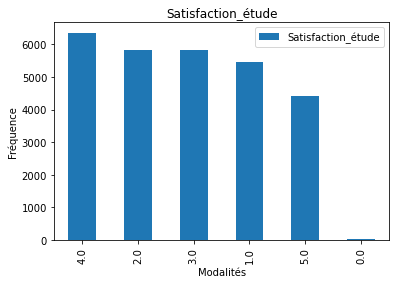

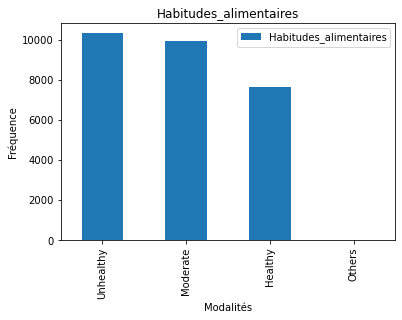

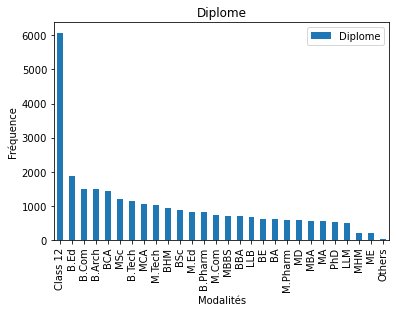

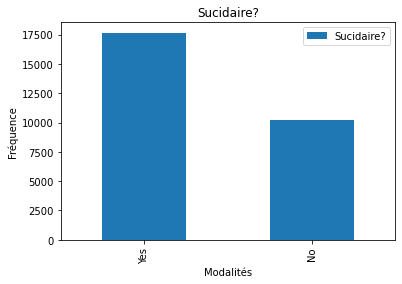

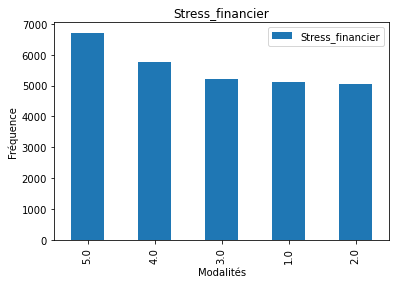

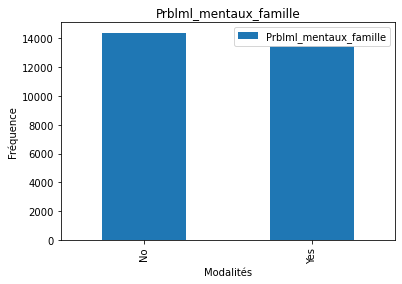

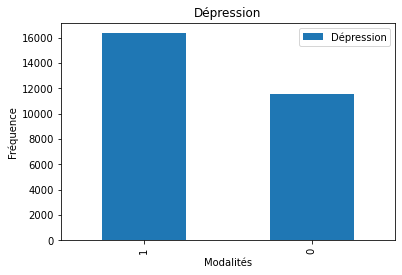

In [10]:
for var in cat_var:
    data[var].value_counts().plot(kind='bar')
    plt.title(var)
    plt.legend()
    plt.xlabel('Modalités')
    plt.ylabel('Fréquence')
    plt.show()

In [11]:
num_var = ["Age", "Note_a_l'école", "Heures_de_travail"]

Nous effectuons ensuite un boxplot pour cette fois ci analyser les variables quantitatives.

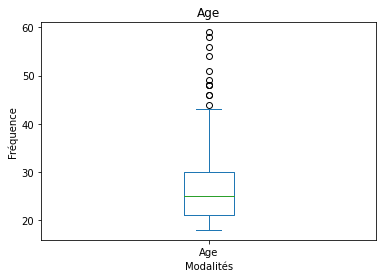

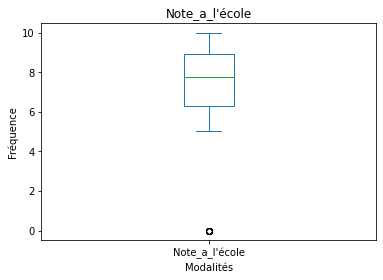

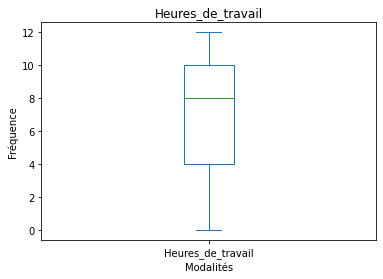

In [12]:
for var in num_var:
    data[var].plot(kind='box')
    plt.title(var)
    plt.xlabel('Modalités')
    plt.ylabel('Fréquence')
    plt.show()

Pour chaque variable qualitative, nous examinons le pourcentage de personnes en dépression et de perosnnes qui ne sont pas en dépression.

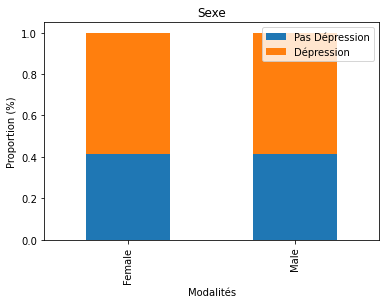

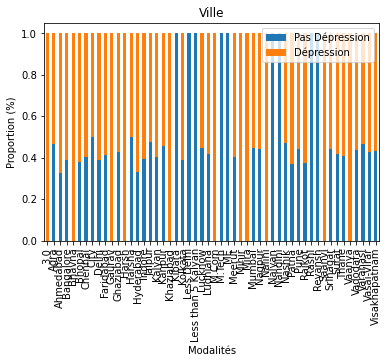

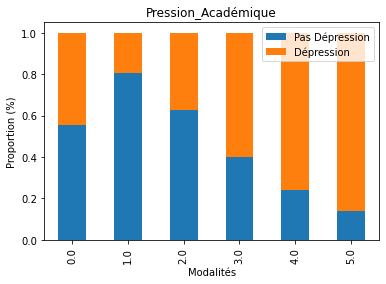

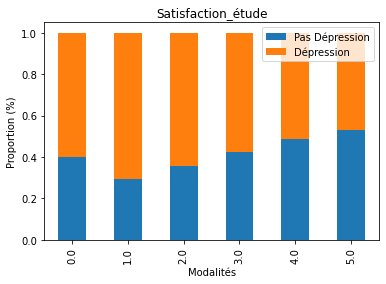

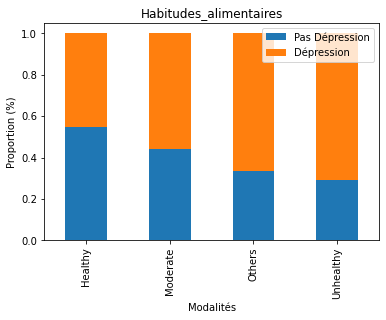

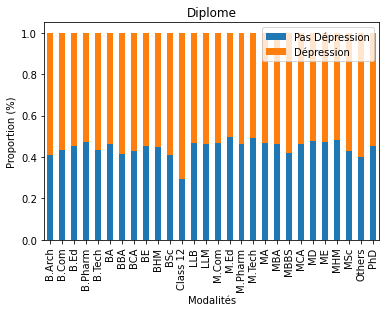

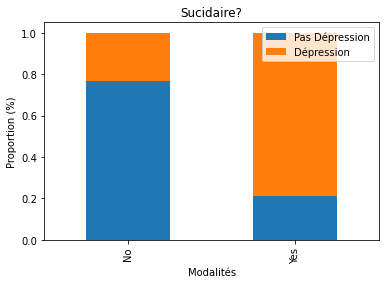

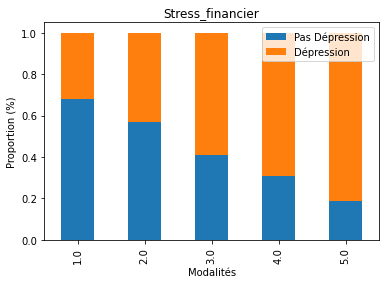

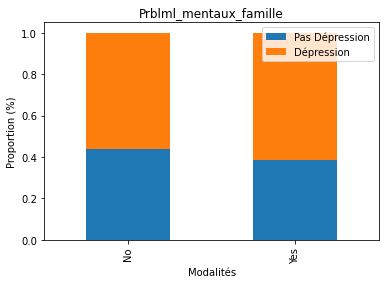

In [13]:
import seaborn as sns
# Sélectionner les variables catégorielles
cat_vars = ["Sexe", "Ville", "Pression_Académique", 
               "Satisfaction_étude", "Habitudes_alimentaires", "Diplome", "Sucidaire?",
           "Stress_financier", "Prblml_mentaux_famille"]

# Générer un count plot pour chaque variable catégorielle
# Définir la taille des figures




# Générer un bar plot pour chaque variable catégorielle
for var in cat_vars:
    figsize = (20, 20)
    #pour chaque modélité de chaque variable on calcule la fréquence de la variables Dépression
    (data.groupby([var, "Dépression"])['Dépression'].count()/data.groupby([var])[var].count()).unstack(level=1).plot(kind='bar', stacked=True)
    plt.title(var)
    plt.xlabel('Modalités')
    plt.ylabel('Proportion (%)')
    plt.legend(['Pas Dépression', 'Dépression']) #Attention si on met Dépression en premier ça fausse tous nos résultats, en général ça commence toujours par 0 puis 1
    plt.show()

On remarque que pour les variables "Prblml_mentaux_famille", "diplôme" et "sexe", il n'y a pas réellement de différence significative entre dépression et non dépression. En revanche, il y a une différence pour les autres variables. 

Nous effectuons ensuite un test du chi 2 puisque jusqu'à maintenant on avait juste une idée des variables qui pourraient être significatives dans la prédiction de la dépression, mais nous n'avions pas de preuves. Le test du chi 2 va quant à lui nous fournir ces preuves. 

In [14]:
from scipy.stats import chi2_contingency

cat_vars = ["Sexe", "Ville", "Pression_Académique", 
               "Satisfaction_étude", "Habitudes_alimentaires", "Diplome", "Sucidaire?",
           "Stress_financier", "Prblml_mentaux_famille"]

# Initialiser les listes pour stocker les résultats
var_names = []
chi2_stats = []
p_values = []

# Parcourir toutes les variables catégorielles
for var in cat_vars:
    # Calculer le tableau de contingence
    contingency_table = pd.crosstab(data["Dépression"], data[var])
    # Calculer la statistique de test du Chi-deux et la p-valeur
    chi2, p, dl, expected = chi2_contingency(contingency_table)
    # Ajouter les résultats aux listes correspondantes
    var_names.append(var)
    chi2_stats.append(chi2)
    p_values.append(p)

# Créer un DataFrame avec les résultats
results_df = pd.DataFrame({
    'Variable': var_names,
    'Chi2': chi2_stats,
    'P-valeur': p_values,
})

# Trier le DataFrame par ordre croissant de Chi2
results_df.sort_values(by='Chi2', inplace=True,ascending=False)

# Afficher le tableau des résultats
print(results_df)

                 Variable         Chi2       P-valeur
6              Sucidaire?  8323.866373   0.000000e+00
2     Pression_Académique  6427.249219   0.000000e+00
7        Stress_financier  3702.388501   0.000000e+00
4  Habitudes_alimentaires  1202.638176  1.962485e-260
3      Satisfaction_étude   793.872438  2.448361e-169
5                 Diplome   531.355688   5.125450e-95
1                   Ville   187.935629   1.471828e-17
8  Prblml_mentaux_famille    79.434429   4.984981e-19
0                    Sexe     0.082658   7.737273e-01


A part la variables "sexe", toutes les autres variables sont significatives car elles ont une p-value inférieure à 0,05. C'est-à-dire qu'elles peuvent jouer un rôle dans notre modèle, nous décidons de les garder toutes (sauf la variable "sexe").

Nous faisons de même avec les variables quantitatives sauf qu'au lieu de faire un barplot nous faisons un boxplot, et à la place du test du chi deux nous effectuons un test Kruskal-Wallis.

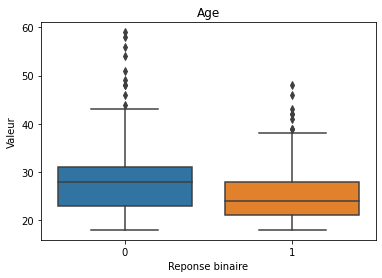

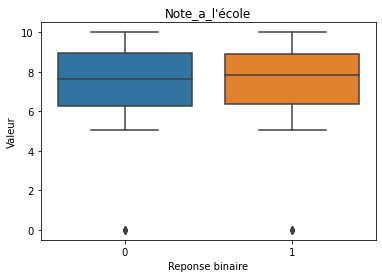

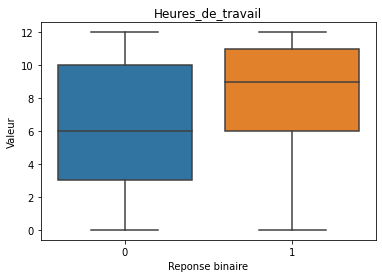

In [15]:
# Sélectionner les variables numériques
num_vars = ["Age", "Note_a_l'école", "Heures_de_travail"]


# Générer un box plot pour chaque variable numérique
for var in num_vars:
    sns.boxplot(x='Dépression', y=var, data=data)
    plt.title(var)
    plt.xlabel('Reponse binaire')
    plt.ylabel('Valeur')
    plt.show()

Seule la variable "note_a_l'école" semble être non significative, prouvons le avec un test Kruskal-Wallis.

In [16]:
import scipy.stats as stats
# Initialiser les listes pour stocker les résultats
var_names = []
kw_stats = []
p_values = []

# Parcourir toutes les variables numériques
for var in num_vars:
    # Calculer les groupes de valeurs
    groups = [data[data["Dépression"] == 0][var], data[data["Dépression"] == 1][var]]
    # Appliquer le test de Kruskal-Wallis
    kw_stat, p = stats.kruskal(*groups) 
    #kw attend à avoir plusieurs arguments (tous les différents), sauf que chez nous ils sont regroupé dans une liste donc au 
    #lieu de les écrire un par un manuellement on utilise * qui le fait à notre place 
    # Ajouter les résultats aux listes correspondantes
    var_names.append(var)
    kw_stats.append(kw_stat)
    p_values.append(p)

# Créer un DataFrame avec les résultats
results_df = pd.DataFrame({
    'Variable': var_names,
    'Kruskal-Wallis': kw_stats,
    'P-valeur': p_values
})

# Trier le DataFrame par ordre croissant de p-valeur
results_df.sort_values(by='P-valeur', inplace=True)

# Afficher le tableau des résultats
print(results_df)

            Variable  Kruskal-Wallis       P-valeur
0                Age     1416.371668  5.818961e-310
2  Heures_de_travail     1123.519639  2.553138e-246
1     Note_a_l'école       13.240451   2.739720e-04


Au final, toutes les variables sont significatives puisqu'elles ont une p-value inférieure à 0,05. 

# Modèles

Commençons désormais à effectuer nos premiers modèles. Pour cela, nous allons tout d'abord préparer nos données. Le but étant ici de prédire si l'étudiant est en dépression ou non donc la variable **y** est "Dépressions". 

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [18]:
import statsmodels.api as sm

X = data[["Age", "Note_a_l'école", "Heures_de_travail", "Pression_Académique", "Satisfaction_étude", 
          "Habitudes_alimentaires", "Diplome", "Sucidaire?","Stress_financier", "Prblml_mentaux_famille"]]




y = data["Dépression"]

Nous commençons par le modèle le plus simple : **la régression logistique**.

Nous transformons les variables qualitatives en variables binaires pour pouvoir les utiliser dans notre régression logistique.

In [19]:
X = pd.get_dummies(X, columns = ["Pression_Académique", "Satisfaction_étude","Diplome",
          "Habitudes_alimentaires","Sucidaire?","Stress_financier", "Prblml_mentaux_famille"], drop_first = True)


# drop_first = True veut dire que pour les variables bianires qu'on transforme en dummies, on supprimes la variable 0 
# car sinon on aura multicolinéarité entre les variables 

In [20]:
X.head()

,Age,Note_a_l'école,Heures_de_travail,Pression_Académique_1.0,Pression_Académique_2.0,Pression_Académique_3.0,Pression_Académique_4.0,Pression_Académique_5.0,Satisfaction_étude_1.0,Satisfaction_étude_2.0,...,Diplome_PhD,Habitudes_alimentaires_Moderate,Habitudes_alimentaires_Others,Habitudes_alimentaires_Unhealthy,Sucidaire?_Yes,Stress_financier_2.0,Stress_financier_3.0,Stress_financier_4.0,Stress_financier_5.0,Prblml_mentaux_famille_Yes
0,33.0,8.97,3.0,0,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
1,24.0,5.90,3.0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
2,31.0,7.03,9.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,28.0,5.59,4.0,0,0,1,0,0,0,1,...,0,1,0,0,1,0,0,0,1,1
4,25.0,8.13,1.0,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0


In [21]:
# Ajouter une constante pour l'interception
X = sm.add_constant(X)

#Par défaut, certains algorithmes (comme ceux de Statsmodels) supposent qu'il n'y a pas d'ordonnée à l'origine 

C:\Users\Nesho\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Nous divisons ensuite notre jeu de données en 2, un train set pour l'entraînement et un test set pour "évaluer" notre modèle autrement dit pour voir si notre modèle arrive bien à généraliser. 

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#random_state = 42 : 

#Reproductibilité : Si vous fixez le paramètre random_state (par exemple, random_state=42), 
#                      le générateur aléatoire produira le même découpage des données à chaque exécution du script. Cela 
#                      garantit que les résultats sont reproductibles.

#Comparabilité : En fixant random_state, vous vous assurez que tout le monde (collaborateurs, reviewers, etc.) 
#                travaille avec le même jeu d'entraînement et de test, ce qui est essentiel pour comparer les performances 
#                des modèles."""

#En gros ça utilise le même découpage 

#Ici le 42 n'a pas d'importance cest juste un "code"

In [23]:
print(X_train.dtypes)  #il faut convertir TOUTES les variables catégoriques en dummies 

const                               float64
Age                                 float64
Note_a_l'école                      float64
Heures_de_travail                   float64
Pression_Académique_1.0               uint8
Pression_Académique_2.0               uint8
Pression_Académique_3.0               uint8
Pression_Académique_4.0               uint8
Pression_Académique_5.0               uint8
Satisfaction_étude_1.0                uint8
Satisfaction_étude_2.0                uint8
Satisfaction_étude_3.0                uint8
Satisfaction_étude_4.0                uint8
Satisfaction_étude_5.0                uint8
Diplome_B.Com                         uint8
Diplome_B.Ed                          uint8
Diplome_B.Pharm                       uint8
Diplome_B.Tech                        uint8
Diplome_BA                            uint8
Diplome_BBA                           uint8
Diplome_BCA                           uint8
Diplome_BE                            uint8
Diplome_BHM                     

Toutes nos nouvelles variables sont biens numériques donc nous pouvons réaliser la régression logistique. 

In [24]:
# Créer le modèle de régression logistique
logit_model = sm.Logit(y_train, X_train)

In [25]:
# Ajuster le modèle aux données d'apprentissage
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.346222
         Iterations 7


Nous avons enlevé la variable ville car sinon il y aurait eu trop d'itérations.

In [26]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:             Dépression   No. Observations:                22320
Model:                          Logit   Df Residuals:                    22270
Method:                           MLE   Df Model:                           49
Date:                Mon, 13 Jan 2025   Pseudo R-squ.:                  0.4893
Time:                        18:49:40   Log-Likelihood:                -7727.7
converged:                       True   LL-Null:                       -15133.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -2.0995      1.000     -2.099      0.036      -4.060      -0.139
Age                                 -0.1158      0.006    -20.944

Nous remarquons que de nombreuses variables ont une p valeur > 0,05 donc nous allons créer une autre régression en enlevant les variables non significatives. Nous décidons quand même de tester la qualité de ce modèle en analysant la courbe ROC pour avoir une idée. 

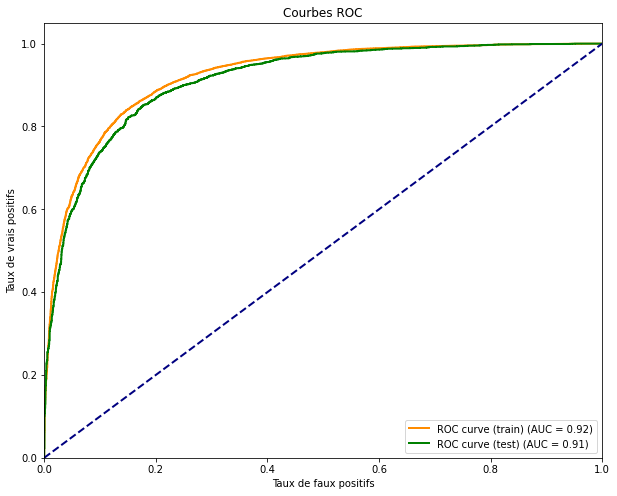

In [27]:
from sklearn.metrics import roc_curve, auc
# Obtenir les prédictions du modèle sur l'ensemble d'entraînement et de test
y_train_pred = result.predict(X_train)
y_test_pred = result.predict(X_test)

# Calculer les courbes ROC et les aires sous la courbe (AUC)
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred)
roc_auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_pred)
roc_auc_test = auc(fpr_test, tpr_test)

# Tracer les courbes ROC
plt.figure(figsize=(10, 8))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='ROC curve (train) (AUC = %0.2f)' % roc_auc_train)
plt.plot(fpr_test, tpr_test, color='green', lw=2, label='ROC curve (test) (AUC = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend(loc="lower right")
plt.show()

Nous avons un bon AUC dans la régression avec la base d'entraînements et de tests, respectivement de 0,92 et 0,91. De plus vu que les AUC sont proches cela signifie qu'il n'y a pas de overfitting et de underfitting.

Nous supprimons désormais les variables avec une p valeur trop élévée. Vu qu'il s'agit des mêmes étapes que la regréssion précédente nous allons directement passer à l'interprétation des résulats. 

In [28]:
import statsmodels.api as sm

X = data[["Age", "Note_a_l'école", "Heures_de_travail", "Pression_Académique", "Satisfaction_étude", 
          "Habitudes_alimentaires", "Diplome", "Sucidaire?","Stress_financier", "Prblml_mentaux_famille"]]

X = X.drop(columns = ["Diplome", "Satisfaction_étude"], axis =1)


y = data["Dépression"]

In [29]:
X = pd.get_dummies(X, columns = ["Pression_Académique",
          "Habitudes_alimentaires","Sucidaire?","Stress_financier", "Prblml_mentaux_famille"], drop_first = True)

In [30]:
X.head()

,Age,Note_a_l'école,Heures_de_travail,Pression_Académique_1.0,Pression_Académique_2.0,Pression_Académique_3.0,Pression_Académique_4.0,Pression_Académique_5.0,Habitudes_alimentaires_Moderate,Habitudes_alimentaires_Others,Habitudes_alimentaires_Unhealthy,Sucidaire?_Yes,Stress_financier_2.0,Stress_financier_3.0,Stress_financier_4.0,Stress_financier_5.0,Prblml_mentaux_famille_Yes
0,33.0,8.97,3.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
1,24.0,5.90,3.0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
2,31.0,7.03,9.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,28.0,5.59,4.0,0,0,1,0,0,1,0,0,1,0,0,0,1,1
4,25.0,8.13,1.0,0,0,0,1,0,1,0,0,1,0,0,0,0,0


In [31]:
X = X.drop(columns = ["Pression_Académique_1.0", "Pression_Académique_2.0", "Pression_Académique_3.0", 
                      "Pression_Académique_4.0", "Habitudes_alimentaires_Others"], axis = 1)

In [32]:
X.head()

,Age,Note_a_l'école,Heures_de_travail,Pression_Académique_5.0,Habitudes_alimentaires_Moderate,Habitudes_alimentaires_Unhealthy,Sucidaire?_Yes,Stress_financier_2.0,Stress_financier_3.0,Stress_financier_4.0,Stress_financier_5.0,Prblml_mentaux_famille_Yes
0,33.0,8.97,3.0,1,0,0,1,0,0,0,0,0
1,24.0,5.90,3.0,0,1,0,0,1,0,0,0,1
2,31.0,7.03,9.0,0,0,0,0,0,0,0,0,1
3,28.0,5.59,4.0,0,1,0,1,0,0,0,1,1
4,25.0,8.13,1.0,0,1,0,1,0,0,0,0,0


In [33]:
# Ajouter une constante pour l'interception
X = sm.add_constant(X)

C:\Users\Nesho\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
# Créer le modèle de régression logistique
logit_model = sm.Logit(y_train, X_train)

In [36]:
# Ajuster le modèle aux données d'apprentissage
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.397500
         Iterations 7


In [37]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:             Dépression   No. Observations:                22320
Model:                          Logit   Df Residuals:                    22307
Method:                           MLE   Df Model:                           12
Date:                Mon, 13 Jan 2025   Pseudo R-squ.:                  0.4137
Time:                        18:49:52   Log-Likelihood:                -8872.2
converged:                       True   LL-Null:                       -15133.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -1.8913      0.157    -12.030      0.000      -2.199      -1.583
Age                                 -0.1000      0.004    -25.351

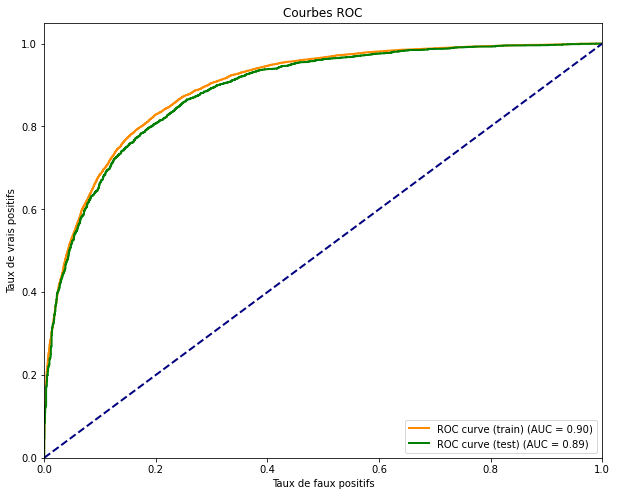

In [38]:
from sklearn.metrics import roc_curve, auc
# Obtenir les prédictions du modèle sur l'ensemble d'entraînement et de test
y_train_pred = result.predict(X_train)
y_test_pred = result.predict(X_test)

# Calculer les courbes ROC et les aires sous la courbe (AUC)
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred)
roc_auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_pred)
roc_auc_test = auc(fpr_test, tpr_test)

# Tracer les courbes ROC
plt.figure(figsize=(10, 8))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='ROC curve (train) (AUC = %0.2f)' % roc_auc_train)
plt.plot(fpr_test, tpr_test, color='green', lw=2, label='ROC curve (test) (AUC = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend(loc="lower right")
plt.show()

Nous obtenons un AUC de 0,90 pour la base d'entraînement et 0,89 pour la base de test ce qui est un peu moins ce qu'on a trouvé auparavant mais cette fois-ci tous les variables sont significatives. De plus cela reste un score très élevé puisqu'en effet, notre modèle est capable de prédire 9 fois sur 10 le bon résultat. Enfin, il n'y a pas de overfitting et underfitting puisque les courbes ROC sont proches. Nous pouvons donc en conclure que notre modèle est bon. L'équation de la courbe est  : 

**ln(p/(1-p)) = −1.8913 − 0.1000 × Age + 0.0521 × Note_a_l’ecole + 0.1157 × Heures_de_travail + 1.9041 × Pression_Academique_5.0 + 0.4483 × Habitudes_alimentaires_Moderate + 1.0410 × Habitudes_alimentaires_Unhealthy + 2.5692 × Suicidaire_Yes + 0.4110 × Stress_financier_2.0 + 1.0448 × Stress_financier_3.0 + 1.4930 × Stress_financier_4.0 + 2.1803 × Stress_financier_5.0 + 0.2788 × Prblml_mentaux_famille_Yes**

Même si on obtient un bon AUC, nous allons essayer un autres modèle, celui de l'arbre de décision pour vérifier si nous obtenons pas un meilleur résultat.

# Autres modèles 

## Arbre de décision 

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [40]:
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [41]:
y_pred = model_dt.predict(X_test)

In [42]:
report = classification_report(y_pred, y_test)

In [43]:
print(report)

              precision    recall  f1-score   support

           0       0.69      0.68      0.69      2376
           1       0.77      0.78      0.77      3205

    accuracy                           0.74      5581
   macro avg       0.73      0.73      0.73      5581
weighted avg       0.74      0.74      0.74      5581



Nous obtenons une précision globale de 0,74 ce qui est plus faible que la précision obtenue avec la régression logistique qui était de 0,89. Nous allons donc optimiser notre modèle en effectuant une validation croisée. 

Ici, le paramètre que nous allons optimiser est la profondeur de l'arbre. 

In [44]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [45]:
params = {'max_depth' : [3, 5, 10, 15]}

In [46]:
grid_search = GridSearchCV(estimator=model_dt, param_grid=params, cv=5)

In [47]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 10, 15]})

In [48]:
grid_search.best_params_

{'max_depth': 5}

Nous obtenons le meilleur résultat quand la profondeur de l'arbre est fixé a 5

In [49]:
best_model = grid_search.best_estimator_

In [50]:
best_model

DecisionTreeClassifier(max_depth=5, random_state=42)

In [51]:
y_pred2 = best_model.predict(X_test)

In [52]:
report2 = classification_report(y_pred2, y_test)

In [53]:
print(report2)

              precision    recall  f1-score   support

           0       0.73      0.78      0.76      2188
           1       0.85      0.81      0.83      3393

    accuracy                           0.80      5581
   macro avg       0.79      0.80      0.79      5581
weighted avg       0.80      0.80      0.80      5581



Cette fois ci, nous avons une précision globale de 0,80 ce qui est mieux. Il faut maintenant évaluer si le modèle est en underfitting ou overfitting

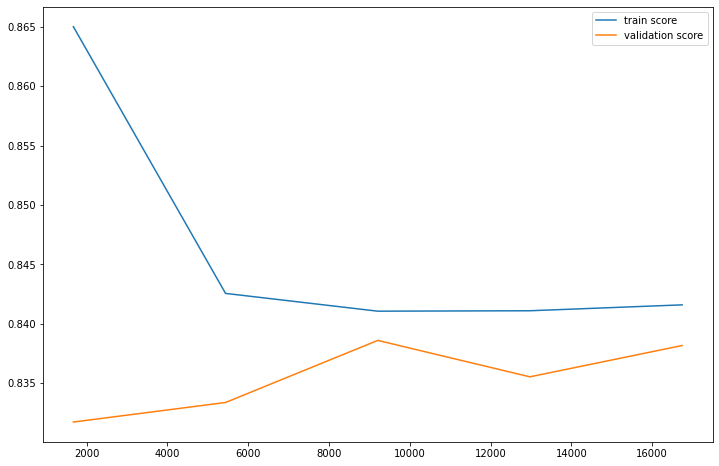

In [54]:
from sklearn.model_selection import learning_curve

N, train_score, val_score = learning_curve(best_model, X_train, y_train,
                                              cv=4, scoring='f1')
    

plt.figure(figsize=(12,8))
plt.plot(N, train_score.mean(axis=1), label = "train score")
plt.plot(N, val_score.mean(axis=1), label = "validation score")
plt.legend()

Il n'y a pas d'overfitting ou underfitting puisque les courbes sont proches, mais le modèle est toujours moins bien que la régression logistique.  

# Autres modèles 

Dans cette section nous allons effectuer plusieurs modèles en même temps et choisir le meilleur. Puis nous allons optimiser le 
meilleur modèle parmi ces nouveaux modèles. Les modèles que nous allons effectués sont : un Random Forest, un Adaboost et un SVM. On ne va pas effectuer de KNN car le jeu de données comporte beaucoup trop d'observations. 

In [55]:
from sklearn.pipeline import make_pipeline

In [57]:
from tqdm import tqdm

In [58]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [59]:
RandomForest = RandomForestClassifier(random_state=42)
Adaboost = AdaBoostClassifier(random_state=42)
SVM = make_pipeline(StandardScaler(), SVC(random_state=42))


In [60]:
dict_of_models = {"RandomForest" : RandomForest,
                  "Adaboost" : Adaboost,
                  "SVM" : SVM,
                  }

#on crée un dictionnaire et pas une liste pour avoir le nom de chaque modèle dans nos classification report 


In [79]:
def evaluation(model):
    
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    print(classification_report(y_test, ypred))
    
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4, scoring='accuracy')
    
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()


  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

RandomForest
              precision    recall  f1-score   support

           0       0.76      0.74      0.75      2343
           1       0.81      0.83      0.82      3238

    accuracy                           0.79      5581
   macro avg       0.79      0.79      0.79      5581
weighted avg       0.79      0.79      0.79      5581




 33%|████████████████████████████                                                        | 1/3 [00:21<00:43, 21.61s/it]

Adaboost
              precision    recall  f1-score   support

           0       0.80      0.74      0.77      2343
           1       0.82      0.86      0.84      3238

    accuracy                           0.81      5581
   macro avg       0.81      0.80      0.81      5581
weighted avg       0.81      0.81      0.81      5581




 67%|████████████████████████████████████████████████████████                            | 2/3 [00:27<00:12, 12.61s/it]

SVM
              precision    recall  f1-score   support

           0       0.80      0.73      0.76      2343
           1       0.82      0.87      0.84      3238

    accuracy                           0.81      5581
   macro avg       0.81      0.80      0.80      5581
weighted avg       0.81      0.81      0.81      5581




100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [04:19<00:00, 86.61s/it]


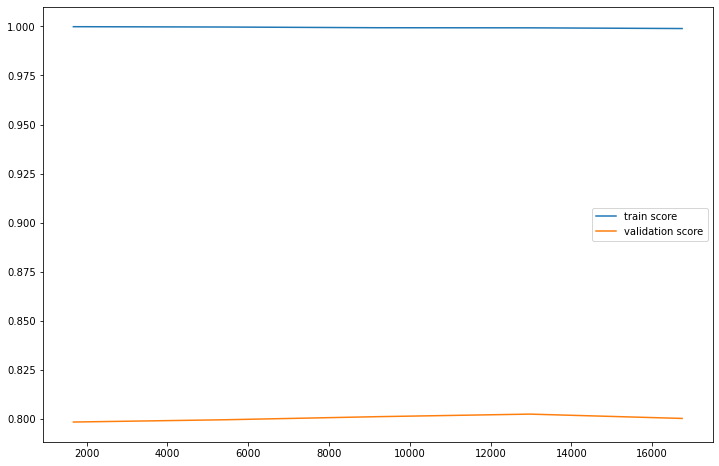

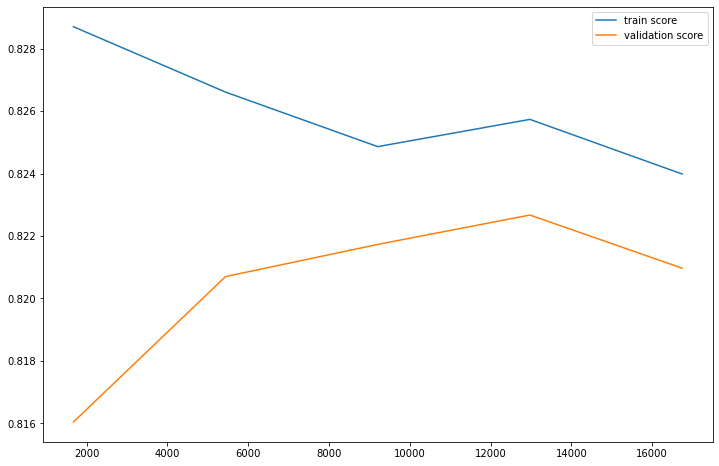

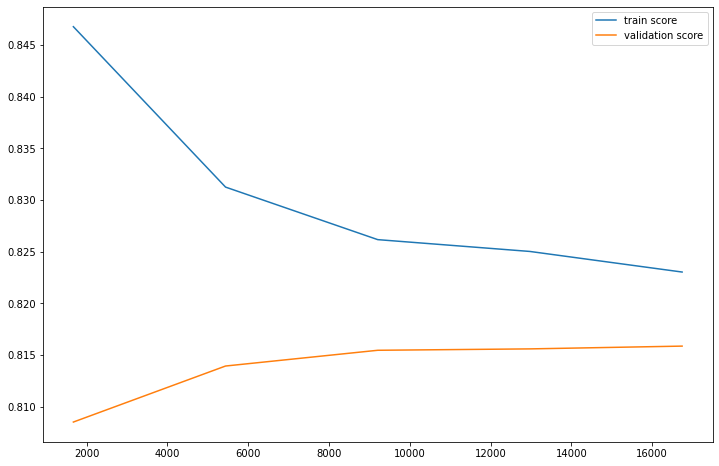

In [80]:
for name, model in tqdm(dict_of_models.items()):
    print(name)
    evaluation(model)

Le Random forest est le pire modèle car il y a overfitting. Cependant, le SVM et l'Adaboost sont les meilleurs modèles. Pour la suite, nous allons garder que le SVM car c'est le modèle où il y a le moins d'overfiiting (même si on aurait pu choisir l'Adaboost).

Nous allons maintenant optimiser les paramètres de notre SVM. 

In [64]:
SVM.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('svc', SVC(random_state=42))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'svc': SVC(random_state=42),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'svc__C': 1.0,
 'svc__break_ties': False,
 'svc__cache_size': 200,
 'svc__class_weight': None,
 'svc__coef0': 0.0,
 'svc__decision_function_shape': 'ovr',
 'svc__degree': 3,
 'svc__gamma': 'scale',
 'svc__kernel': 'rbf',
 'svc__max_iter': -1,
 'svc__probability': False,
 'svc__random_state': 42,
 'svc__shrinking': True,
 'svc__tol': 0.001,
 'svc__verbose': False}

Les paramètres que nous allons optimiser sont C et gamma. Le paramètre C répresente la tolérance ou non aux erreurs alors que le paramètre gamma contrôle l'étendu de l'influence d'un seul point d'entraînement.

In [68]:
params_SVM = {"svc__gamma" : [0.0001, 0.001, 0.005],
              "svc__C" : [1, 10, 100, 1000],
              }

In [81]:
grid_SVM = GridSearchCV(estimator=SVM, param_grid=params_SVM, cv=4)

In [82]:
tqdm(grid_SVM.fit(X_train, y_train))


0it [00:00, ?it/s]

In [83]:
grid_SVM.best_params_

{'svc__C': 100, 'svc__gamma': 0.0001}

In [84]:
best_model_SVM = grid_SVM.best_estimator_

In [85]:
y_pred_SVM = best_model_SVM.predict(X_test)

In [86]:
report_SVM = classification_report(y_test, y_pred_SVM)
print(report_SVM)

              precision    recall  f1-score   support

           0       0.80      0.71      0.76      2343
           1       0.81      0.87      0.84      3238

    accuracy                           0.81      5581
   macro avg       0.81      0.79      0.80      5581
weighted avg       0.81      0.81      0.80      5581



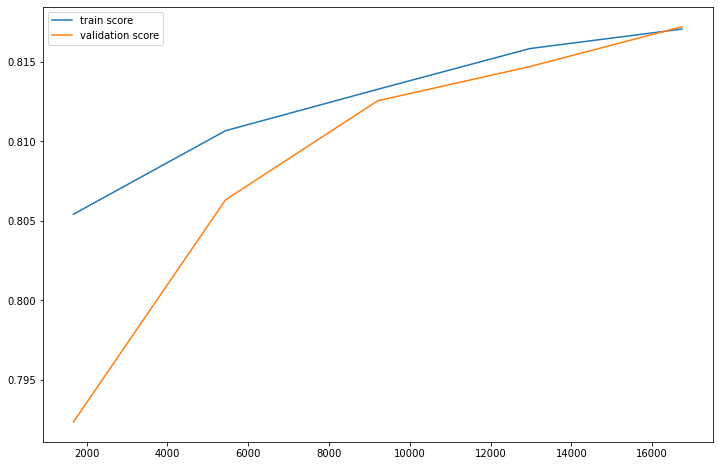

In [87]:
N_SVM, train_score_SVM, val_score_SVM = learning_curve(best_model_SVM, X_train, y_train,
                                              cv=4, scoring='accuracy')
    
    
plt.figure(figsize=(12, 8))
plt.plot(N_SVM, train_score_SVM.mean(axis=1), label='train score')
plt.plot(N_SVM, val_score_SVM.mean(axis=1), label='validation score')
plt.legend()

In [90]:
best_model_SVM.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('svc', SVC(C=100, gamma=0.0001, random_state=42))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'svc': SVC(C=100, gamma=0.0001, random_state=42),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'svc__C': 100,
 'svc__break_ties': False,
 'svc__cache_size': 200,
 'svc__class_weight': None,
 'svc__coef0': 0.0,
 'svc__decision_function_shape': 'ovr',
 'svc__degree': 3,
 'svc__gamma': 0.0001,
 'svc__kernel': 'rbf',
 'svc__max_iter': -1,
 'svc__probability': False,
 'svc__random_state': 42,
 'svc__shrinking': True,
 'svc__tol': 0.001,
 'svc__verbose': False}

Au final, même avec l'optimisation SVM, nous obtenons le même score accuracy (environ 0,84). Ainsi, nous allons rester sur le modèle le plus simple c'est à dire sans l'optimisation. 

# Conclusion 

Cependant, le plus performant parmi tous nos modèles reste la régression logistique avec une précision globale de 0,89 autrement dit le modèle prédit de manière juste (environ 9 fois sur 10) si l'étudiant en question est en dépression ou non. Nous choisissons donc ce modèle !